<a href="https://colab.research.google.com/github/hcnancho/lickan_ventas_2023/blob/main/Lickan_Deep_2022_RNN_df_al_gato_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploracion de Datos LickanPets

*   Importación de las Librerias
*   Conexión con Google Drive

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_lickan = pd.read_excel('/content/drive/MyDrive/Proyecto_Deep_Lickan2022/bd_lickan_ventas_2016_oct_01_2022.xlsx')

##Extraccion del dataframe Alimento de Gato

In [ ]:
df_lickan.shape

(78828, 30)

Descripción incial de datos y revision de valores nulos

### Copiamos la data, para mantener los datos originales sin alteración, en el caso que los necesitemos revisar nuevamente

In [ ]:
df_lmod = df_lickan.copy() 

### Quitamos las columnas que parecieran redundante para la primera etapa del analisis

In [ ]:
df_lmod = df_lmod.drop(columns=['Email Cliente','Ciudad Cliente','Comuna Cliente','Dirección Cliente','Detalle de Productos/Servicios Pack/Promo','Margen','Cliente','Tipo Movimiento', 'Vendedor', 'Tipo de Documento', 'Rut Cliente', 'Tracking Number','Lista de Precio', 'Fecha Documento', 'Precio Neto Unitario', 'Subtotal Impuestos', 'Subtotal Neto', 'Costo Neto Unitario', 'Costo Total Neto', '% Margen','Otros Atributos'])

revisamos que valores siguen siendo nulos para el dataframe reducido y los eliminamos

In [ ]:
null_columns=df_lmod.columns[df_lmod.isnull().any()]
df_lmod[null_columns].isnull().sum()
print(df_lmod[df_lmod.isnull().any(axis=1)][null_columns].head())
df_lmod = df_lmod.dropna(how='any')

      Sucursal  Numero Documento Fecha Venta Hora Venta  \
78827      NaN               NaN         NaN        NaN   

      Tipo de Producto / Servicio  SKU Producto / Servicio  Cantidad  
78827                         NaN  NaN                 NaN       NaN  


In [ ]:
df_lmod.isnull().sum()

Sucursal                       0
Numero Documento               0
Fecha Venta                    0
Hora Venta                     0
Tipo de Producto / Servicio    0
SKU                            0
Producto / Servicio            0
Cantidad                       0
Subtotal Bruto                 0
dtype: int64

In [ ]:
df_lmod.shape

(78827, 9)

### Cambiamos el encabezado de las colummas para hacer mas simple la interpretación de los datos

In [ ]:
df_lmod = df_lmod.rename(columns={'Tipo de Producto / Servicio':'Familia_Producto_Servicio',
                                   'Producto / Servicio':'Producto_Servicio', 'Fecha Venta':'Fecha_Venta', 'Hora Venta':'Hora_Venta' })

Agrupasmos el Dataframe por Familia de productos, ya que este nos permitira identificar cual es la que más aporta a los ingresos del negocio. Las Familias son : Alimento, Peluquería, Veterinaria, Farmacia, Ladrería y Pet Shop

In [ ]:
#hacemos una copia de la data, asegurando que los datos que tome sean mayo que 0 en las ventas
df_lmod_FPS = df_lmod.copy()
df_lmod_FPS = df_lmod_FPS[(df_lmod_FPS['Subtotal Bruto'] > 0)]
df_lmod_FPS = df_lmod_FPS.replace({'Accesorio para perro': 'PETS SHOP', "Bowl Dog": 'PETS SHOP', 'Collar':'PETS SHOP', 'CIRUGÍA':'Veterinaria','CIRUGÍA EXTRACCIÓN MASA OCULAR':'Veterinaria','ESTERILIZACIONES Y CASTRACIONES':'Veterinaria','Sin Tipo':'Veterinaria'})
df_lmod_FPS['Familia_Producto_Servicio'].unique()

array(['PETS SHOP', 'ALIMENTO', 'PELUQUERÍA', 'Veterinaria', 'FARMACIA',
       'LADRERÍA', 'Cuidados Pets'], dtype=object)

##Construeccion de la Familia Alimentos (Alimento, Alimento Perro y Alimento Gato)

In [ ]:
#hacemos una copia de la data que contenga solo alimentos, asegurando que los datos que tome sean mayo que 0 en las ventas

df_lmod_Al = df_lmod_FPS[(df_lmod_FPS.Familia_Producto_Servicio == 'ALIMENTO')&(df_lmod_FPS['Subtotal Bruto'] > 0)]
df_lmod_Al.head()

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
4,Casa Matriz,3.0,16/12/2016,10:52 AM,ALIMENTO,12295045,PRO PLAN DOG DELICATE SMALL BREED 3KG,1.0,14681
7,Casa Matriz,5.0,16/12/2016,01:18 PM,ALIMENTO,12294992,PRO PLAN DOG EXIGENT SM BR 3KG,1.0,14681
13,Casa Matriz,10.0,16/12/2016,07:52 PM,ALIMENTO,12294283,PRO PLAN CAT ADULT CAT 3 KGS,1.0,15947
19,Casa Matriz,14.0,17/12/2016,09:19 AM,ALIMENTO,12294993,PRO PLAN DOG PUPPY SMALL BREED 3 KG,1.0,14319
37,Casa Matriz,23.0,17/12/2016,03:54 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436


In [ ]:
df_lmod_Al.Familia_Producto_Servicio.unique()

array(['ALIMENTO'], dtype=object)

Ordenamos las fechas, dentro de la data

In [ ]:
import datetime
df_lmod_Al['Fecha_Venta']= pd.to_datetime(df_lmod_Al['Fecha_Venta']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_lmod_Al_sort=df_lmod_Al.sort_values(by=['Fecha_Venta'])

In [ ]:
df_lmod_Al_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25861 entries, 4 to 78058
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sucursal                   25861 non-null  object        
 1   Numero Documento           25861 non-null  float64       
 2   Fecha_Venta                25861 non-null  datetime64[ns]
 3   Hora_Venta                 25861 non-null  object        
 4   Familia_Producto_Servicio  25861 non-null  object        
 5   SKU                        25861 non-null  object        
 6   Producto_Servicio          25861 non-null  object        
 7   Cantidad                   25861 non-null  float64       
 8   Subtotal Bruto             25861 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 2.0+ MB


Separamos entre alimentos de gatos y perro, usando palabras claves que se encuentran presentes en los nombres de cada alimento

In [ ]:
df_al_perro = df_lmod_Al_sort[(df_lmod_Al_sort.Producto_Servicio.str.contains(' DOG | PERRO | PUPPY | CACHORRO | PEDIGREE | Excellent | CACHUPIN | EXCELLENT'))]
df_al_gato = df_lmod_Al_sort[(df_lmod_Al_sort.Producto_Servicio.str.contains(' GATO | CAT | KITTEN | FELINE | GATI '))]

In [ ]:
df_al_perro.head()

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
4,Casa Matriz,3.0,2016-12-16,10:52 AM,ALIMENTO,12295045,PRO PLAN DOG DELICATE SMALL BREED 3KG,1.0,14681
7,Casa Matriz,5.0,2016-12-16,01:18 PM,ALIMENTO,12294992,PRO PLAN DOG EXIGENT SM BR 3KG,1.0,14681
19,Casa Matriz,14.0,2016-12-17,09:19 AM,ALIMENTO,12294993,PRO PLAN DOG PUPPY SMALL BREED 3 KG,1.0,14319
40,Casa Matriz,24.0,2016-12-17,04:24 PM,ALIMENTO,12294993,PRO PLAN DOG PUPPY SMALL BREED 3 KG,1.0,14319
44,Casa Matriz,28.0,2016-12-17,06:20 PM,ALIMENTO,12294994,PRO PLAN DOG PUPPY SMALL BREED 1 KG,1.0,5428


In [ ]:
df_al_gato.head()

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
13,Casa Matriz,10.0,2016-12-16,07:52 PM,ALIMENTO,12294283,PRO PLAN CAT ADULT CAT 3 KGS,1.0,15947
37,Casa Matriz,23.0,2016-12-17,03:54 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
113,Casa Matriz,80.0,2016-12-20,10:17 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
142,Casa Matriz,96.0,2016-12-21,08:39 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
146,Casa Matriz,99.0,2016-12-22,10:58 AM,ALIMENTO,12294320,PRO PLAN CAT URINARY 3KG,1.0,5951


In [ ]:
df_al_gato.describe()

,Numero Documento,Cantidad,Subtotal Bruto
count,4616.000000,4616.000000,4616.000000
mean,29924.360052,1.712088,20645.803943
std,11242.179153,3.939201,15075.249090
min,10.000000,1.000000,700.000000
25%,25638.000000,1.000000,9990.000000
50%,32115.500000,1.000000,17990.000000
75%,37564.000000,1.000000,24990.000000
max,46014.000000,120.000000,180000.000000


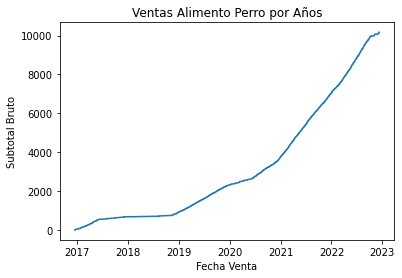

In [ ]:
plt.figure()

plt.plot(df_al_perro.Fecha_Venta,np.arange(df_al_perro.Fecha_Venta.shape[0]))
plt.xlabel('Fecha Venta')
plt.ylabel('Subtotal Bruto')
plt.title('Ventas Alimento Perro por Años')
plt.show()

##Construccion del primer modelo
Usaremos un RNN

Vamos a sub dividir el conjunto de entrenamiento en entrenamiento y validación.

In [ ]:
df = pd.DataFrame(df_al_gato['Fecha_Venta'])
df = df.assign(Ventas = df_al_gato['Subtotal Bruto'])

df_sort=df.sort_values(by=['Fecha_Venta'])


In [ ]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4616 entries, 13 to 78042
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Venta  4616 non-null   datetime64[ns]
 1   Ventas       4616 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 108.2 KB


In [ ]:
df_sort

,Fecha_Venta,Ventas
13,2016-12-16,15947
37,2016-12-17,6436
113,2016-12-20,6436
142,2016-12-21,6436
146,2016-12-22,5951
...,...,...
78035,2022-12-09,49600
78044,2022-12-09,47990
78049,2022-12-09,17990
78018,2022-12-09,15500


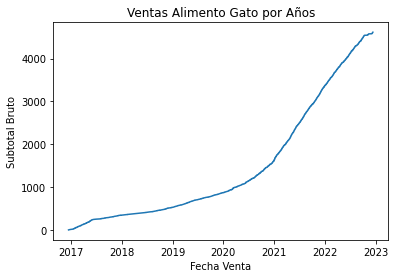

In [ ]:
plt.plot(df_sort.Fecha_Venta,np.arange(df_sort.Fecha_Venta.shape[0]))
plt.xlabel('Fecha Venta')
plt.ylabel('Subtotal Bruto')
plt.title('Ventas Alimento Gato por Años')
plt.show()

In [ ]:
# Extraemos la columna Ventas para el desarrollo del modelo Deep Learning

df_sort = df_sort.drop(columns=['Fecha_Venta'])
df_sort.head()

,Ventas
13,15947
37,6436
113,6436
142,6436
146,5951


In [ ]:
dataset = df_sort.values
dataset = dataset.astype('float32')
print('Shape conjunto de datos : {}'.format(dataset.shape))
print('Ejemplo : \n{}'.format(dataset[:3]))

Shape conjunto de datos : (4616, 1)
Ejemplo : 
[[15947.]
 [ 6436.]
 [ 6436.]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

print('Antes de escalar')
print('valor min : {}, valor max : {}'.format(np.amin(dataset), np.amax(dataset)))

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print('Despues de escalar')
print('valor min : {}, valor max : {}'.format(np.amin(dataset), np.amax(dataset)))

Antes de escalar
valor min : 700.0, valor max : 180000.0
Despues de escalar
valor min : 0.0, valor max : 1.0


In [ ]:
#Separamos el dataset en Entrenamiento y Test
split = int(len(dataset) * 0.67)
train, test = dataset[:split,:], dataset[split:,:]
print('Train : {}, Test : {}'.format(train.shape, test.shape)) 

Train : (3092, 1), Test : (1524, 1)


Reordenar los datos para hacer la predicción

X = t

y = t+1

In [ ]:
# Train

look_back = 30
X_train, y_train = [], []

for i in range(len(train)-look_back-1):
  x = train[i:(i+look_back), 0]
  y = train[i+look_back, 0]

  X_train.append(x)
  y_train.append(y)

	
X_train, y_train = np.array(X_train), np.array(y_train)
print('X :{},\nY : {}'.format(X_train[:5], y_train[:5]))

print('\nX shape: {}, y shape: {}'.format(X_train.shape, y_train.shape))

X :[[0.08503625 0.03199108 0.03199108 0.03199108 0.02928611 0.02928611
  0.09010597 0.03199108 0.09010597 0.10377579 0.09010597 0.10122699
  0.03508087 0.03508087 0.03786949 0.11595092 0.03508087 0.10368098
  0.20407139 0.10368098 0.09810373 0.03284997 0.03508087 0.20407139
  0.10368098 0.08862241 0.03508087 0.03508087 0.09810373 0.03508087]
 [0.03199108 0.03199108 0.03199108 0.02928611 0.02928611 0.09010597
  0.03199108 0.09010597 0.10377579 0.09010597 0.10122699 0.03508087
  0.03508087 0.03786949 0.11595092 0.03508087 0.10368098 0.20407139
  0.10368098 0.09810373 0.03284997 0.03508087 0.20407139 0.10368098
  0.08862241 0.03508087 0.03508087 0.09810373 0.03508087 0.20407139]
 [0.03199108 0.03199108 0.02928611 0.02928611 0.09010597 0.03199108
  0.09010597 0.10377579 0.09010597 0.10122699 0.03508087 0.03508087
  0.03786949 0.11595092 0.03508087 0.10368098 0.20407139 0.10368098
  0.09810373 0.03284997 0.03508087 0.20407139 0.10368098 0.08862241
  0.03508087 0.03508087 0.09810373 0.035080

In [ ]:
# Test
look_back = 30
X_test, y_test = [], []

for i in range(len(test)-look_back-1):
  x = test[i:(i+look_back), 0]
  y = test[i+look_back, 0]

  X_test.append(x)
  y_test.append(y)

	
X_test, y_test = np.array(X_test), np.array(y_test)
print('X :{},\nY : {}'.format(X_test[:5], y_test[:5]))

X :[[0.20239821 0.13547127 0.1070831  0.08527607 0.09643056 0.10758505
  0.08527607 0.08527607 0.09085331 0.0295594  0.08527607 0.1856107
  0.13547127 0.06854434 0.09643056 0.09643056 0.02398215 0.25817066
  0.08527607 0.20239821 0.0797546  0.24701616 0.09643056 0.06854434
  0.25817066 0.06854434 0.06854434 0.06854434 0.24701616 0.19124372]
 [0.13547127 0.1070831  0.08527607 0.09643056 0.10758505 0.08527607
  0.08527607 0.09085331 0.0295594  0.08527607 0.1856107  0.13547127
  0.06854434 0.09643056 0.09643056 0.02398215 0.25817066 0.08527607
  0.20239821 0.0797546  0.24701616 0.09643056 0.06854434 0.25817066
  0.06854434 0.06854434 0.06854434 0.24701616 0.19124372 0.11316229]
 [0.1070831  0.08527607 0.09643056 0.10758505 0.08527607 0.08527607
  0.09085331 0.0295594  0.08527607 0.1856107  0.13547127 0.06854434
  0.09643056 0.09643056 0.02398215 0.25817066 0.08527607 0.20239821
  0.0797546  0.24701616 0.09643056 0.06854434 0.25817066 0.06854434
  0.06854434 0.06854434 0.24701616 0.1912437

Actualmente nuestro conjunto de datos de entrada se encuentra organizados como **[#muestras, dato]**, pero necesitamos que sea **[#muestras, time steps, dato]** para que sea una entrada correcta para la RNN (de acuerdo a la [documentación](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)).

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print('train : {}, test : {}'.format(X_train.shape, X_test.shape))

train : (3061, 1, 30), test : (1493, 1, 30)


## Modelo - Simple RNN

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()

model.add(SimpleRNN(128, activation='relu',input_shape=(1,look_back)))
model.add(Dense(1, activation='linear'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_49 (SimpleRNN)   (None, 128)               20352     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20,481
Trainable params: 20,481
Non-trainable params: 0
_________________________________________________________________
None


Compilar

In [ ]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics = ['mse'])

Entrenamiento

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=1000, 
                    batch_size=25, 
                    verbose=2, 
                    validation_split=0.2)

Epoch 1/1000
98/98 - 2s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0097 - val_mse: 0.0097 - 2s/epoch - 19ms/step
Epoch 2/1000
98/98 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0094 - val_mse: 0.0094 - 370ms/epoch - 4ms/step
Epoch 3/1000
98/98 - 0s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0105 - val_mse: 0.0105 - 268ms/epoch - 3ms/step
Epoch 4/1000
98/98 - 0s - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0096 - val_mse: 0.0096 - 350ms/epoch - 4ms/step
Epoch 5/1000
98/98 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0095 - val_mse: 0.0095 - 233ms/epoch - 2ms/step
Epoch 6/1000
98/98 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0098 - 270ms/epoch - 3ms/step
Epoch 7/1000
98/98 - 0s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0094 - val_mse: 0.0094 - 367ms/epoch - 4ms/step
Epoch 8/1000
98/98 - 0s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0094 - val_mse: 0.0094 - 392ms/epoch - 4ms/step
Epoch 9/1000
98/98 - 0s - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0100 - val_mse:

Curva función Costo

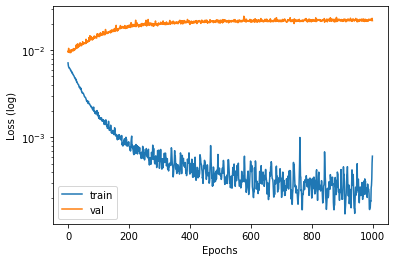

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss (log)')
plt.yscale('log')
plt.legend()

plt.show()

Predicción

In [ ]:
# Obtener predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# Volver a magnitud original
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

Graficar resultados

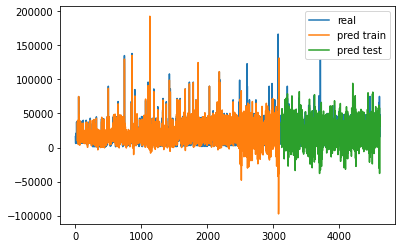

In [ ]:
# Creamos un arreglo vacío para acomodar las predicciones de entrenamiento en el rango correcto
train_predict_curve = np.empty_like(dataset)
train_predict_curve[:, :] = np.nan
train_predict_curve[look_back:len(train_predictions)+look_back, :] = train_predictions

# Hacemos lo mismo para las predicciones del conjunto de test y ubicamos las predicciones luego de las predicciones de entrenamiento.
test_predict_curve = np.empty_like(dataset)
test_predict_curve[:, :] = np.nan
test_predict_curve[len(train_predictions)+(look_back*2)+1:len(dataset)-1, :] = test_predictions

# Graficamos
a1, = plt.plot(scaler.inverse_transform(dataset))
a2, = plt.plot(train_predict_curve)
a3, = plt.plot(test_predict_curve)
plt.legend([a1, a2, a3], ['real','pred train','pred test'])
plt.show()

##La Hipotesis:

**Agosto es el mes historico con mayores ventas en LickanPets**

**Problematica:**

* Definir en base a las ventas historicas, volumen de venta mensual en 2023

* nos gustaria hacer una claseterizacion por familia de producto o por tipo de producto y conocer la proyección de venta.


**Ideas fuezas**

* ¿Cual es el alimento que más se vende y en que momento del mes?

* La segunda semana del mes se vende más alimentos Kitten

* Los perros que consumen PRO PLAN DOG PUPPY SMALL BREED 
 
* La tercera semana de cada mes el producto que más se vende es el PROPLAN GATO KITTEN

* Dividir en cuadrantes y ver tendencia de ventas para comida de perro